<a href="https://colab.research.google.com/github/ouibaa/PUBH5218/blob/main/Week_1_Generalised_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercises (Week 1)

## Question 1

In [2]:
# NAME: WEBER LIU
# DATE: 09-03-2021
# USE: EXERCISE 1

In [3]:
# Read data
data = read.csv("https://raw.githubusercontent.com/ouibaa/PUBH5218/main/datasets/bmd_drug.csv")

In [4]:
# import libraries
install.packages("skimr")
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
# View dataset
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1077  
Number of columns          11    
_______________________          
Column type frequency:           
  character                3     
  numeric                  8     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 sex                   0             1     1     1     0        2          0
2 fracture              0             1     8    11     0        2          0
3 medication            0             1    13    15     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate     mean       sd      p0      p25
1 id                    0             1 9712.    8755.      3     21

## Question 2

In [6]:
# calcualte BMI variable
data$bmi = data$weight_kg/ ((data$height_cm / 100) ^ 2)

In [7]:
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             1077  
Number of columns          12    
_______________________          
Column type frequency:           
  character                3     
  numeric                  9     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 sex                   0             1     1     1     0        2          0
2 fracture              0             1     8    11     0        2          0
3 medication            0             1    13    15     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate     mean       sd      p0      p25
1 id                    0             1 9712.    8755.      3     21

## Question 3

In [8]:
help(t.test)

In [9]:
# Comparing hip BMI for men vs. women using unpaired t-test
t.test(bmdtot_hip ~ sex, alternative = "two.sided", var.equal = TRUE, data = data)


	Two Sample t-test

data:  bmdtot_hip by sex
t = -7.8996, df = 1075, p-value = 6.881e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08480897 -0.05106060
sample estimates:
mean in group F mean in group M 
      0.8178973       0.8858321 


## Question 4

In [10]:
# Running a simple linear regression
hipbmd = glm(bmdtot_hip ~ sex, data = data)
summary(hipbmd)


Call:
glm(formula = bmdtot_hip ~ sex, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.49613  -0.08650   0.00167   0.08960   0.47657  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.817897   0.005958   137.3  < 2e-16 ***
sexM        0.067935   0.008600     7.9 6.88e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.0198808)

    Null deviance: 22.613  on 1076  degrees of freedom
Residual deviance: 21.372  on 1075  degrees of freedom
AIC: -1159.3

Number of Fisher Scoring iterations: 2


## Question 5

In [11]:
install.packages("jtools")
library(jtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘jtools’


The following objects are masked from ‘package:interactions’:

    cat_plot, interact_plot, johnson_neyman, probe_interaction,
    sim_slopes




In [12]:
hipbmd.bmi = glm(bmdtot_hip ~ sex + bmi, data = data)
summ(hipbmd.bmi, digits = 3, confint = TRUE)

MODEL INFO:
Observations: 1077
Dependent Variable: bmdtot_hip
Type: Linear regression 

MODEL FIT:
χ²(2) = 4.412, p = 0.000
Pseudo-R² (Cragg-Uhler) = -0.109
Pseudo-R² (McFadden) = -0.212
AIC = -1330.260, BIC = -1310.332 

Standard errors: MLE
----------------------------------------------------------
                     Est.    2.5%   97.5%   t val.       p
----------------- ------- ------- ------- -------- -------
(Intercept)         0.463   0.411   0.515   17.432   0.000
sexM                0.083   0.068   0.099   10.394   0.000
bmi                 0.013   0.011   0.015   13.679   0.000
----------------------------------------------------------

Estimated dispersion parameter = 0.017 

There is a statistically significant positive association between sex and hip BMD when adjusted for BMI. For a fixed value of BMI, the average hip BMD increases by 0.083 (0.068 - 0.099)

## Question 6

In [13]:
hipbmd.bmi_sex = lm(bmdtot_hip ~ sex * bmi, data = data)
summ(hipbmd.bmi_sex, digits = 3, confint = TRUE)

MODEL INFO:
Observations: 1077
Dependent Variable: bmdtot_hip
Type: OLS linear regression 

MODEL FIT:
F(3,1073) = 93.873, p = 0.000
R² = 0.208
Adj. R² = 0.206 

Standard errors: OLS
-------------------------------------------------------------
                      Est.     2.5%    97.5%   t val.       p
----------------- -------- -------- -------- -------- -------
(Intercept)          0.540    0.476    0.603   16.774   0.000
sexM                -0.137   -0.242   -0.032   -2.559   0.011
bmi                  0.010    0.008    0.013    8.779   0.000
sexM:bmi             0.008    0.004    0.012    4.165   0.000
-------------------------------------------------------------

There is a statistically significant effect modification of the effect BMI and hip BMD by the variable of sex (P < 0.001).

In [14]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



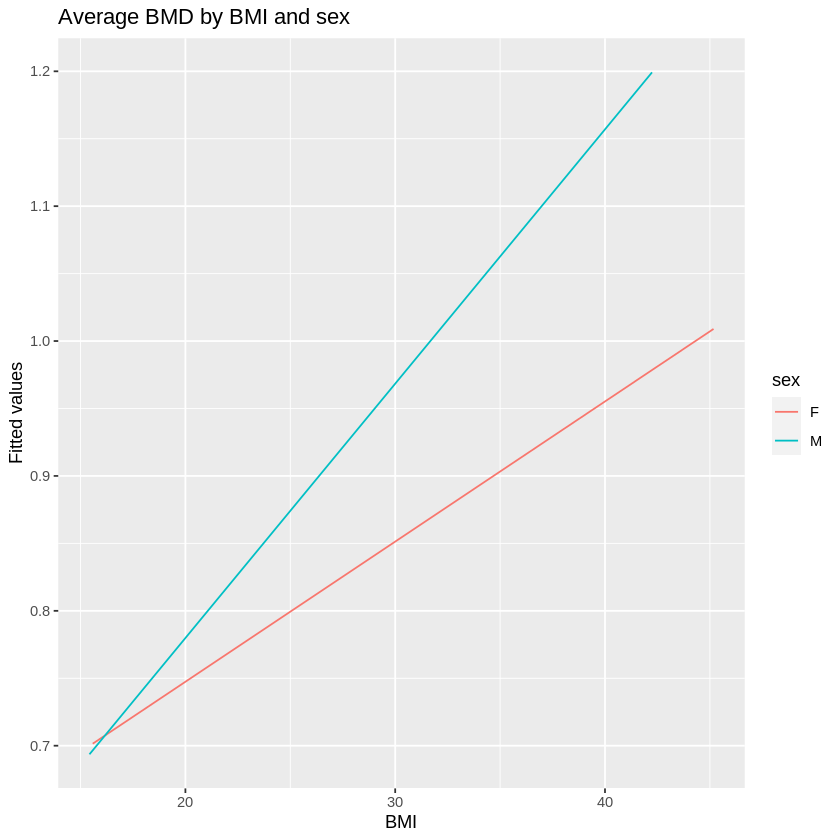

In [15]:
data$fitted = hipbmd.bmi_sex$fitted.values

ggplot(data = data, aes (x = bmi, y = fitted, group = sex, colour = sex)) + geom_line() +
  labs(title = "Average BMD by BMI and sex", 
    x = "BMI", y = "Fitted values")

Plotting interactions - we had to get model predictions, which are easy due to small amounts of predictor variables. With more variables, we need to fix the value of the predictor before getting predictions. Alternatively, use interact_plot

In [16]:
install.packages("interactions")
library(interactions)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



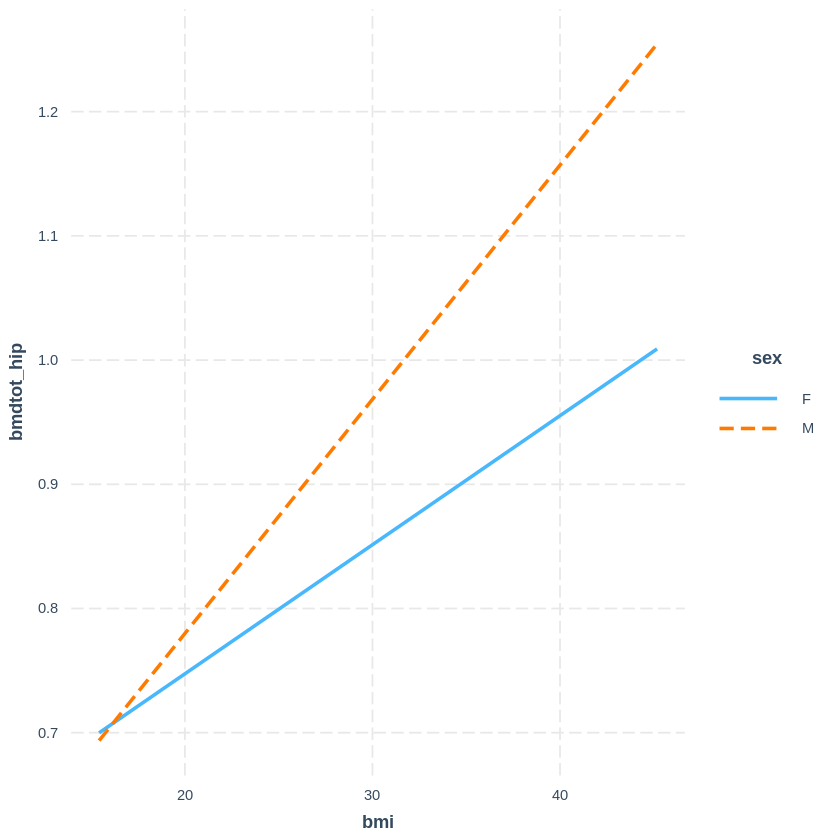

In [18]:
interact_plot(hipbmd.bmi_sex, pred = bmi, modx = sex)

## Question 7


There is statistically significant evidence of sex affecting BMI in the prediction of BMD. Therefore the preferred model is one which includes sex as an interation term.
We can compaire their AIC - smaller AIC is better fit.

In [19]:
AIC(hipbmd.bmi)

[1] -1330.26

In [20]:
AIC(hipbmd.bmi_sex)

[1] -1345.529

In [23]:
install.packages("ggfortify")
library(ggfortify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




Warning message:
“`arrange_()` was deprecated in dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


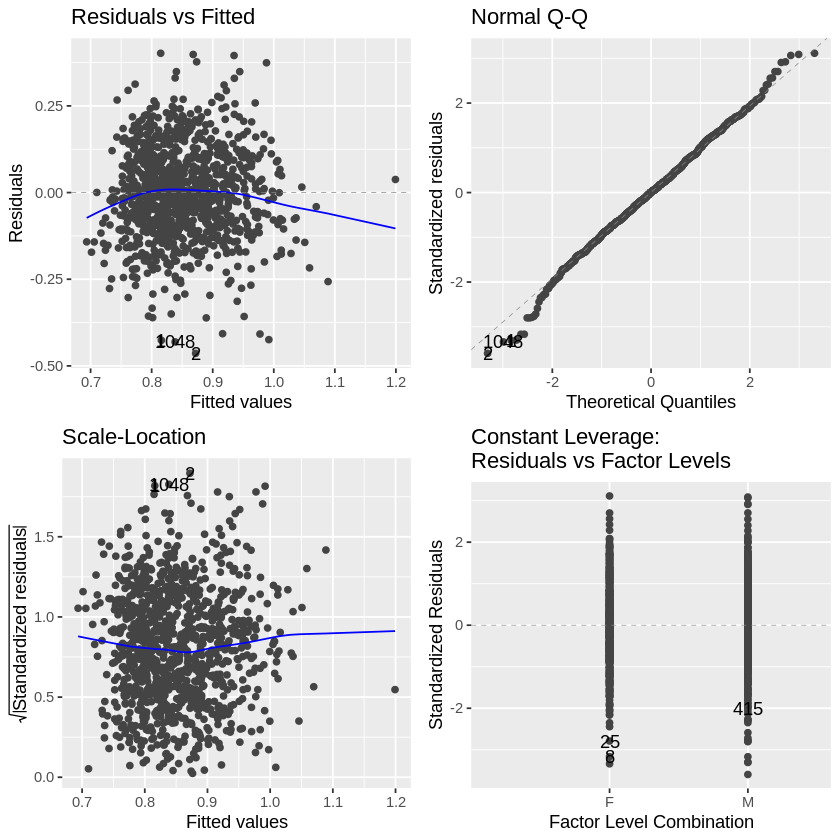

In [24]:
autoplot(hipbmd.bmi_sex)

1. curve in first residuals plot - may explore whether a polynomial for BMI is a better fit
2. bottom left - smooth line, mostly horizontal - no issues with heteroscedasticity
3. Normal Q-Q plot is good

We should also check Cook's D values to determine if observations are exerting undue influence

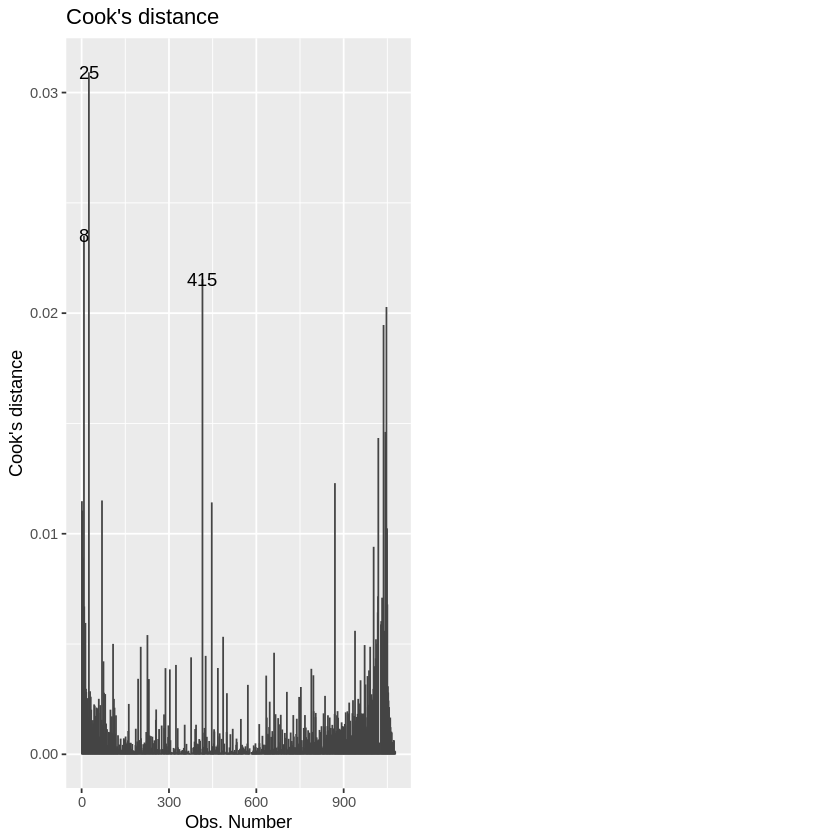

In [25]:
autoplot(hipbmd.bmi_sex, which = 4)

### Interpreting Cook's D
- 0.5 quoted as the threshold for an observation causing an issue
- 4 / n may be another cutoff to use (n = 1077 here, therefore limit is 0.004) - though this might be too conservative...
- you can exclude values with the largest cook D and refit the regression analysis to ensure the conclusions do not change

## Question 8

In [26]:
table(data$fracture)


   fracture no fracture 
         50        1027 

In [27]:
# converting this to a factor variable
data$fracture = factor(data$fracture)
table(data$fracture)


   fracture no fracture 
         50        1027 

In [28]:
# Fitting model
frac.glm <- glm(fracture ~ bmi + age, data = data, family = binomial)

In [29]:
summ(frac.glm, model.fit = FALSE)

MODEL INFO:
Observations: 1077
Dependent Variable: fracture
Type: Generalized linear model
  Family: binomial 
  Link function: logit 

Standard errors: MLE
------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)          1.87   1.48     1.26   0.21
bmi                  0.25   0.05     5.40   0.00
age                 -0.08   0.01    -5.61   0.00
------------------------------------------------

In [30]:
levels(data$fracture)

[1] "fracture"    "no fracture"

In [31]:
# Re-ordering the fracture variable such that 0 = no fracture, 1 = fracture
data$fracture <- relevel(data$fracture, ref = 'no fracture')
levels(data$fracture)

[1] "no fracture" "fracture"

In [34]:
frac.glm <- glm(fracture ~ bmi + age, data = data, family = binomial)
summ(frac.glm, model.fit = FALSE, exp = TRUE)

MODEL INFO:
Observations: 1077
Dependent Variable: fracture
Type: Generalized linear model
  Family: binomial 
  Link function: logit 

Standard errors: MLE
------------------------------------------------------------
                    exp(Est.)   2.5%   97.5%   z val.      p
----------------- ----------- ------ ------- -------- ------
(Intercept)              0.15   0.01    2.82    -1.26   0.21
bmi                      0.78   0.71    0.85    -5.40   0.00
age                      1.08   1.05    1.11     5.61   0.00
------------------------------------------------------------

For each one unit increase in BMI, the odds of fracture decreases by 22% (1 - 0.78), for people of the same age (OR = 0.78, 95% CI 0.71 - 0.85).

## Question 9


In [35]:
frac.glm_interaction <- glm(fracture ~ bmi*age, data = data, family = binomial)

In [36]:
summ(frac.glm_interaction)

MODEL INFO:
Observations: 1077
Dependent Variable: fracture
Type: Generalized linear model
  Family: binomial 
  Link function: logit 

MODEL FIT:
χ²(3) = 73.58, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.21
Pseudo-R² (McFadden) = 0.18
AIC = 339.05, BIC = 358.98 

Standard errors: MLE
------------------------------------------------
                     Est.   S.E.   z val.      p
----------------- ------- ------ -------- ------
(Intercept)          2.81   7.15     0.39   0.69
bmi                 -0.46   0.31    -1.48   0.14
age                  0.01   0.10     0.10   0.92
bmi:age              0.00   0.00     0.67   0.50
------------------------------------------------

There is not enough evidence to suggest that age modifies the effect of BMI on fractures (P-value = 0.50)

## Question 10
Centring the variable - allows you to determine which coefficient estimates change when you centre a continuous variable

In [37]:
data$BMI_c <- scale(data$bmi, center = TRUE, scale = FALSE)
bmd.intc <- lm (bmdtot_hip ~ sex * BMI_c, data = data)
summ(bmd.intc, digits = 3, confint = TRUE)

MODEL INFO:
Observations: 1077
Dependent Variable: bmdtot_hip
Type: OLS linear regression 

MODEL FIT:
F(3,1073) = 93.873, p = 0.000
R² = 0.208
Adj. R² = 0.206 

Standard errors: OLS
-----------------------------------------------------------
                     Est.    2.5%   97.5%    t val.       p
----------------- ------- ------- ------- --------- -------
(Intercept)         0.812   0.801   0.823   147.665   0.000
sexM                0.085   0.069   0.101    10.681   0.000
BMI_c               0.010   0.008   0.013     8.779   0.000
sexM:BMI_c          0.008   0.004   0.012     4.165   0.000
-----------------------------------------------------------

This did not change the estimates for BMI or the interaction. CCentring the variable means that the coefficient for sex now represens the difference between males and females when BMI_c = 0. 
- sex_M estimate = mean difference in BMD for males and females at the average value of BMI

In [38]:
# obtain mean BMI value
mean(data$bmi)

[1] 26.22571

# Question 11

In [40]:
install.packages("multicomp")
library(multicomp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘multicomp’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: ignored

In [ ]:
maleBMIslope <- glht(bmd.int, linfct = c("BMI + sexM:BMI = 0"))
summary(maleBMIslope)
confint(maleBMIslope)

In [ ]:
bmd.int$coefficients[3] + bmd.int$coefficients[4]

In [ ]:
library(biostat3)
lincom(bmd.int, c("BMI", "BMI + sexM:BMI"))